Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [5]:
#load data
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

DATA ANALYSIS

In [6]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1




1.  0-->non - diabetic
2.   1-->diabetic



In [8]:
#number of row and cols
diabetes_dataset.shape

(768, 9)

In [10]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
diabetes_dataset['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


<Axes: xlabel='Outcome', ylabel='count'>

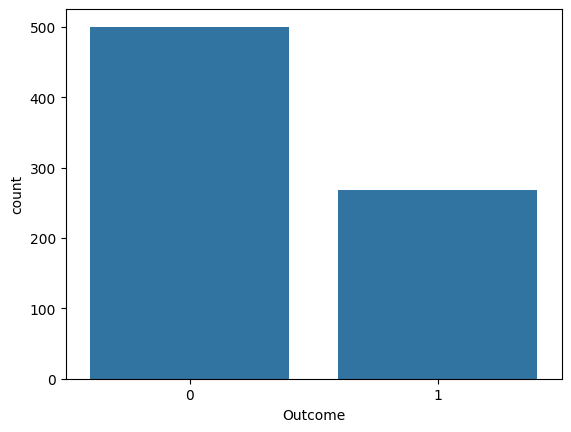

In [12]:
sns.countplot(x='Outcome', data=diabetes_dataset)

In [13]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [15]:
#separate variables
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [16]:
print(X)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6      148             72  ...  33.6                     0.627   50
1              1       85             66  ...  26.6                     0.351   31
2              8      183             64  ...  23.3                     0.672   32
3              1       89             66  ...  28.1                     0.167   21
4              0      137             40  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
764            2      122             70  ...  36.8                     0.340   27
765            5      121             72  ...  26.2                     0.245   30
766            1      126             60  ...  30.1                     0.349   47
767            1       93             70  ...  30.4                     0.315   23

[76

In [17]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [19]:
#standerize the data
scaler = StandardScaler()

In [22]:
scaler.fit(X)
standarized_data = scaler.transform(X)

In [23]:
print(standarized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [24]:
X = standarized_data
Y = diabetes_dataset['Outcome']

TRAIN-TEST SPLIT

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

TRAINING THE MODEL

In [33]:
from sklearn.svm import SVC # Import the SVC class
svm = SVC(kernel = 'linear')
svm.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

In [34]:
#accuracy score for training data
X_train_prediction = svm.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [35]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7866449511400652


In [36]:
#accuracy score for test data
X_test_prediction = svm.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [37]:
print('Accuracy score of the test data : ', testing_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


Check for Random Forest Classifier

In [40]:
#random forest classifier
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(n_estimators=100)
# rf.fit(X_train, Y_train)

RandomForestClassifier()

In [41]:
#accuracy score fot training dataset
# X_train_prediction = rf.predict(X_train)
# training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [42]:
# print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  1.0


In [43]:
#for test dataset
# X_test_prediction = rf.predict(X_test)
# testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [44]:
# print('Accuracy score of the test data : ', testing_data_accuracy)

Accuracy score of the test data :  0.7532467532467533


CONCLUSION:

SVM works better than random forest in this case so we will select SVM classifier has our
model

In [ ]:
#MAKING A PREDICTIVE SYSTEM................

In [51]:
input_data = (4,110,92,0,0,37.6,0.191,30)

#changing input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshape the data
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standarize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = svm.predict(std_data)
# print(prediction)

if(prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.04601433 -0.34096773  1.18359575 -1.28821221 -0.69289057  0.71168975
  -0.84827977 -0.27575966]]
The person is not diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
